# Classification

## Classification using Linear Regression


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.special import softmax

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

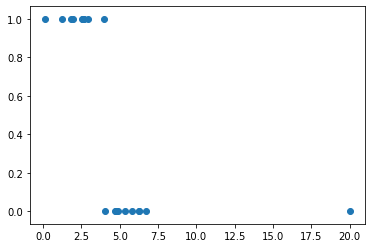

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()
        

0   9.229464
100   3.4833035
200   3.30102
300   3.295055
400   3.2948594
500   3.2948532
600   3.2948532
700   3.294853
800   3.2948527
900   3.2948527
Learned parameter :  [ 0.835831   -0.07360084]


In [6]:
y_model=w_val[0]+w_val[1]*x

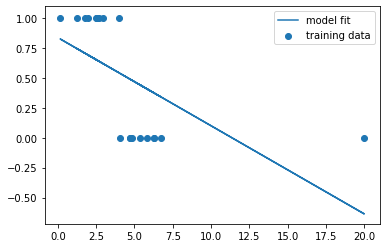

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.133837
100   3.7670326
200   3.6310332
300   3.627511
400   3.6274197
500   3.6274173
600   3.6274173
700   3.627417
800   3.6274173
900   3.6274173
Learned parameter :  [ 0.78393245 -0.06620134]


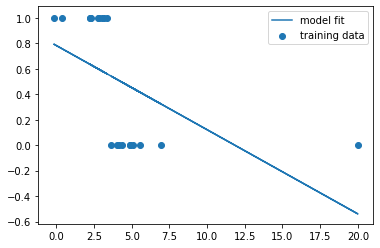

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## Logistic Regression (Classification :P)

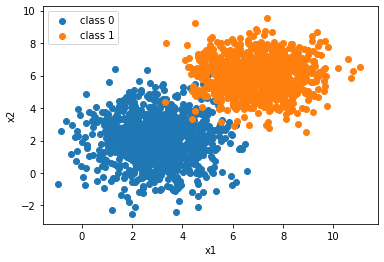

In [10]:
# Gernerate fake 2D data 
x1_l1=np.random.normal(3,1.3,[1000,1])
x1_l2=np.random.normal(7,1.2,[1000,1])
x2_l1=np.random.normal(2,1.5,[1000,1])
x2_l2=np.random.normal(6,1.1,[1000,1])
x1=np.append(x1_l1,x1_l2,axis=0)
x2=np.append(x2_l1,x2_l2,axis=0)
x=np.append(x1,x2,axis=1)
y=np.array([[0.]*len(x1_l1)+[1.]*len(x2_l2)]).T

plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
learning_rate = 0.0001
training_epochs = 3000

def sigmoid(x):
    return 1/(1+np.exp(-x))

(m,n) = x.shape

In [12]:
# define placeholders and variables
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,1])
b = tf.Variable(0.0, name='bias', dtype=tf.float32,trainable=True)
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32, trainable=True)

In [13]:
# model
y_model = tf.sigmoid(tf.matmul(X,w)+b)
#y_model = tf.sigmoid(X@w+b)
#y_model = tf.sigmoid(X[:,0]*w[0,0]+X[:,1]*w[1,0]+b)

In [14]:
# cost
cost = -tf.reduce_sum(Y*tf.log(y_model)+(1-Y)*tf.log(1-y_model))

In [15]:
# trainer
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_model,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_cost = 0
    for epoch in range(training_epochs):
        curr_cost,_ = sess.run([cost,trainer], feed_dict={X:x,Y:y})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
        if abs(prev_cost-curr_cost)<0.001:
            break
        prev_cost = curr_cost
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('Learned weights : ', w_val)
    print('Learned bias : ', b_val)
    print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:y}))
    print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:y}))
    print(sess.run(tf.greater(y_model,0.5),feed_dict={X:x,Y:y}))
    sess.close()

0   1386.2919
100   586.92993
200   406.18866
300   322.2093
400   273.41855
500   241.27081
600   218.33704
700   201.06143
800   187.52362
900   176.59282
1000   167.55789
1100   159.9482
1200   153.43927
1300   147.7997
1400   142.85968
1500   138.4917
1600   134.59811
1700   131.1026
1800   127.94478
1900   125.07599
2000   122.456894
2100   120.05499
2200   117.84329
2300   115.79916
2400   113.90364
2500   112.14043
2600   110.49567
2700   108.95744
2800   107.51532
2900   106.16025
Learned weights :  [[1.2109648]
 [1.228006 ]]
Learned bias :  -11.104351
Correct predictions :  [[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Accuracy : 0.9895
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


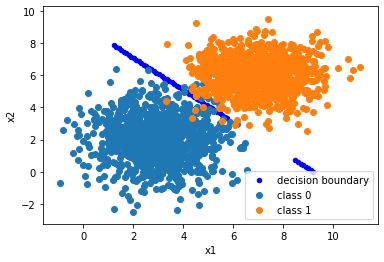

In [17]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[1] - x1_test*w_val[0] - b_val)
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20, label = 'decision boundary')
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Multiclass classification

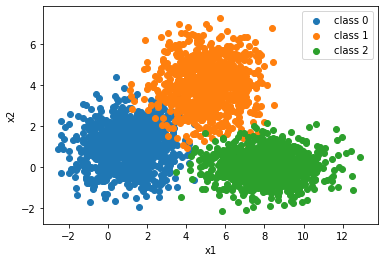

In [18]:
# Gernerate fake 2D data 
# (1,1) (5,4) (8,0)
x1_l1=np.random.normal(1,1.3,[1000,1])
x1_l2=np.random.normal(5,1.2,[1000,1])
x1_l3=np.random.normal(8,1.5,[1000,1])
x2_l1=np.random.normal(1,1.0,[1000,1])
x2_l2=np.random.normal(4,1.1,[1000,1])
x2_l3=np.random.normal(0,0.7,[1000,1])

x1=np.concatenate((x1_l1,x1_l2,x1_l3),axis=0)
x2=np.concatenate((x2_l1,x2_l2,x2_l3),axis=0)
x=np.concatenate((x1,x2),axis=1)
y=np.matrix([[1,0.,0.]]*len(x1_l1)+[[0.,1.,0.]]*len(x2_l2)+[[0.,0.,1.]]*len(x2_l3))

# preview data
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [19]:
# divide to training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7)
(train_size,n_features)=x_train.shape

In [20]:
# hyperparameters
learning_rate = 0.001
training_epochs = 500
num_classes = 3
batch_size = 100

# define placeholders, variables
X = tf.placeholder(tf.float32, [None,n_features])
Y = tf.placeholder(tf.float32, [None,num_classes])
w = tf.Variable(tf.zeros([n_features,num_classes]),dtype=tf.float32, name='weights')
b = tf.Variable(tf.zeros([1,num_classes]),dtype=tf.float32, name='bias')

# softmax model
y_model = tf.nn.softmax(X@w + b)

# cost and train op
cost = tf.reduce_sum(-Y*tf.log(y_model))
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# performance params
correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(training_epochs * train_size // batch_size ):
        datum = (epoch*batch_size) % train_size
        x_batch = x_train[datum: datum+batch_size,:]
        y_batch = y_train[datum: datum+batch_size,:]
        curr_cost, _ = sess.run([cost, trainer], feed_dict={X:x_batch, Y:y_batch})
        if epoch % 100 == 0:
            print(epoch, ": ", curr_cost)
    print("Accuracy : ", sess.run(accuracy, feed_dict={X:x_test,Y:y_test}))
    w_val = sess.run(w)
    b_val = sess.run(b)

0 :  109.8612
100 :  30.072218
200 :  14.469775
300 :  17.42685
400 :  10.311977
500 :  12.740153
600 :  8.404095
700 :  9.867832
800 :  6.620384
900 :  9.201156
1000 :  8.2320175
1100 :  8.537916
1200 :  10.090159
1300 :  9.7955265
1400 :  7.9558954
1500 :  5.415226
1600 :  8.748315
1700 :  7.276224
1800 :  3.2335925
1900 :  11.525839
2000 :  5.629652
2100 :  5.374806
2200 :  6.5688086
2300 :  3.9789195
2400 :  9.3794
2500 :  4.0616007
2600 :  6.093502
2700 :  3.3611994
2800 :  6.122058
2900 :  3.6414618
3000 :  6.268058
3100 :  6.132922
3200 :  6.7970476
3300 :  7.9872065
3400 :  8.529997
3500 :  6.094172
3600 :  3.602434
3700 :  7.449775
3800 :  6.053917
3900 :  1.9483833
4000 :  10.257063
4100 :  4.5662394
4200 :  3.9473104
4300 :  5.332873
4400 :  3.2255604
4500 :  8.775706
4600 :  3.3431466
4700 :  4.992592
4800 :  2.457469
4900 :  5.4121156
5000 :  3.0178611
5100 :  5.591983
5200 :  5.7747917
5300 :  6.4669733
5400 :  7.405148
5500 :  8.1925335
5600 :  5.5321746
5700 :  3.083060

[[5.53457257e-06 1.49198774e-17 3.24490583e-13]
 [5.09174587e-06 1.51637472e-17 3.47039042e-13]
 [4.68435018e-06 1.54116030e-17 3.71154366e-13]
 ...
 [1.29056907e-19 4.05430646e-04 5.12185820e-13]
 [1.18730935e-19 4.12057529e-04 5.47776994e-13]
 [1.09231154e-19 4.18792729e-04 5.85841356e-13]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


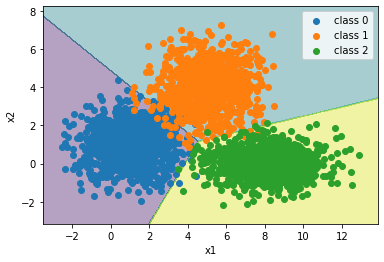

In [22]:
# obtain decision boundary
resolution = 0.05
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min, x2_max,resolution))
xx = np.append(xx1.flatten()[:,np.newaxis],xx2.flatten()[:,np.newaxis],axis=1)
yy = softmax(xx@w_val+b_val)
print(yy)
yy = np.argmax(yy,axis=1).reshape(xx1.shape)
print(yy)
# plot decision boundary
plt.contourf(xx1, xx2, yy, alpha=0.4)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.scatter(x1_l3,x2_l3,label='class 2')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()